In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_election_results(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to load page {url}")

    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table')  # Update this selector based on the actual table structure

    if table is None:
        print(soup.prettify())  # Print the HTML content for inspection
        raise Exception("Table not found on the page. Check the structure of the page and update the scraping logic.")

    rows = table.find_all('tr')

    data = []
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        if cols:  # Only append non-empty rows
            data.append(cols)

    if not data:
        raise Exception("No data found in the table. Check the table structure and ensure it's correctly selected.")

    # Example: Define columns based on table structure
    columns = ["Party Name", "Seats Won", "Leading/Trailing", "Total Seats"]  # Update columns as per actual data
    df = pd.DataFrame(data, columns=columns)
    return df

url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'  # Update with the actual URL
try:
    df = scrape_election_results(url)
    df.to_csv('raw_data.csv', index=False)
    print(df.head())
except Exception as e:
    print(e)


                            Party Name Seats Won Leading/Trailing Total Seats
0         Bharatiya Janata Party - BJP       240                0         240
1       Indian National Congress - INC        99                0          99
2                 Samajwadi Party - SP        37                0          37
3  All India Trinamool Congress - AITC        29                0          29
4      Dravida Munnetra Kazhagam - DMK        22                0          22


Total seats: 543
Party with the highest number of seats: Bharatiya Janata Party - BJP with 240 seats
Party with the lowest number of seats: United People’s Party, Liberal - UPPL with 1 seats
Top 5 parties with the highest number of seats:
                            Party Name  Seats Won
0         Bharatiya Janata Party - BJP        240
1       Indian National Congress - INC         99
2                 Samajwadi Party - SP         37
3  All India Trinamool Congress - AITC         29
4      Dravida Munnetra Kazhagam - DMK         22
                                           Party Name  Seats Won  \
0                        Bharatiya Janata Party - BJP        240   
1                      Indian National Congress - INC         99   
2                                Samajwadi Party - SP         37   
3                 All India Trinamool Congress - AITC         29   
4                     Dravida Munnetra Kazhagam - DMK         22   
5                                  Telugu Desam - TDP

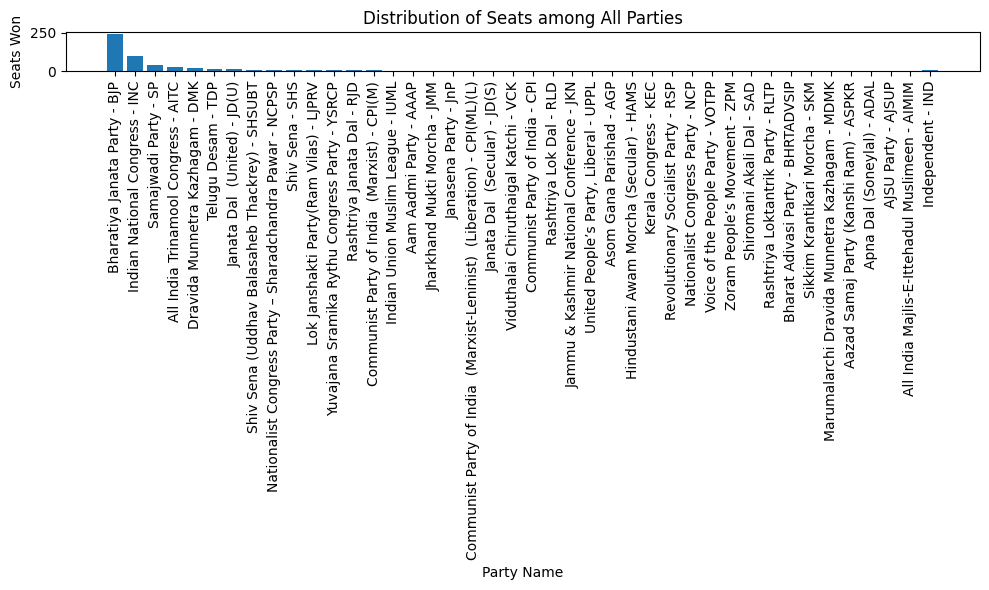

Median seats won by parties: 2.0
Mean seats won by parties: 12.928571428571429
Parties with less than 5 seats:
                                           Party Name  Seats Won
11      Yuvajana Sramika Rythu Congress Party - YSRCP          4
12                         Rashtriya Janata Dal - RJD          4
13       Communist Party of India  (Marxist) - CPI(M)          4
14                  Indian Union Muslim League - IUML          3
15                             Aam Aadmi Party - AAAP          3
16                       Jharkhand Mukti Morcha - JMM          3
17                               Janasena Party - JnP          2
18  Communist Party of India  (Marxist-Leninist)  ...          2
19                      Janata Dal  (Secular) - JD(S)          2
20               Viduthalai Chiruthaigal Katchi - VCK          2
21                     Communist Party of India - CPI          2
22                            Rashtriya Lok Dal - RLD          2
23          Jammu & Kashmir National Confere

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('raw_data.csv')

# Insight 1: Total seats won by each party
total_seats = df['Seats Won'].sum()
print(f"Total seats: {total_seats}")

# Insight 2: Party with the highest number of seats
top_party = df.loc[df['Seats Won'].idxmax()]
print(f"Party with the highest number of seats: {top_party['Party Name']} with {top_party['Seats Won']} seats")

# Insight 3: Party with the lowest number of seats
bottom_party = df.loc[df['Seats Won'].idxmin()]
print(f"Party with the lowest number of seats: {bottom_party['Party Name']} with {bottom_party['Seats Won']} seats")

# Insight 4: Top 5 parties with the highest number of seats
top_5_parties = df.nlargest(5, 'Seats Won')
print("Top 5 parties with the highest number of seats:")
print(top_5_parties[['Party Name', 'Seats Won']])

# Insight 5: Percentage of total seats won by each party
df['Percentage of Total Seats'] = (df['Seats Won'] / total_seats) * 100
print(df[['Party Name', 'Seats Won', 'Percentage of Total Seats']])

# Insight 6: Comparison of top 3 parties
top_3_parties = df.nlargest(3, 'Seats Won')
print("Top 3 parties comparison:")
print(top_3_parties[['Party Name', 'Seats Won', 'Percentage of Total Seats']])

# Insight 7: Parties winning more than 10% of total seats
parties_above_10_percent = df[df['Percentage of Total Seats'] > 10]
print("Parties winning more than 10% of total seats:")
print(parties_above_10_percent[['Party Name', 'Seats Won', 'Percentage of Total Seats']])

# Insight 8: Distribution of seats among all parties (plot)
plt.figure(figsize=(10, 6))
plt.bar(df['Party Name'], df['Seats Won'])
plt.xticks(rotation=90)
plt.xlabel('Party Name')
plt.ylabel('Seats Won')
plt.title('Distribution of Seats among All Parties')
plt.tight_layout()
plt.savefig('distribution_of_seats.png')
plt.show()

# Insight 9: Median and Mean seats won by parties
median_seats = df['Seats Won'].median()
mean_seats = df['Seats Won'].mean()
print(f"Median seats won by parties: {median_seats}")
print(f"Mean seats won by parties: {mean_seats}")

# Insight 10: Insights on small parties (less than 5 seats)
small_parties = df[df['Seats Won'] < 5]
print("Parties with less than 5 seats:")
print(small_parties[['Party Name', 'Seats Won']])

# Save the insights to a CSV file
df.to_csv('election_insights.csv', index=False)
